# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Data

In [2]:
df = pd.read_csv("Data_Ads.csv")

# cek struktur awal
df.head()

,created_date,account_name,campaign_objective,impressions,reach,clicks,link_clicks,content_views,add_to_cart,purchase,purchase_value,amount_spent
0,1/1/2023,Client A - Fashion,Traffic,915434,81436,92554,15544,0.0,0,0,$0,"$2,357,742"
1,1/1/2023,Client A - Fashion,Sales,103328,89200,22100,38038,1199.0,817,824,"$3,353,702","$3,578,529"
2,1/1/2023,Client B - Beauty,Traffic,336015,141082,26321,46107,0.0,0,0,$0,"$1,482,711"
3,1/1/2023,Client B - Beauty,Sales,864410,400596,10719,29397,3395.0,960,591,"$3,470,984","$4,335,272"
4,1/1/2023,Client C - Fashion,Traffic,916254,319415,32995,37496,0.0,0,0,$0,"$1,897,353"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4380 entries, 0 to 4379
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_date        4380 non-null   object 
 1   account_name        4380 non-null   object 
 2   campaign_objective  4380 non-null   object 
 3   impressions         4380 non-null   int64  
 4   reach               4380 non-null   int64  
 5   clicks              4380 non-null   int64  
 6   link_clicks         4380 non-null   int64  
 7   content_views       4380 non-null   float64
 8   add_to_cart         4380 non-null   int64  
 9   purchase            4380 non-null   int64  
 10  purchase_value      4380 non-null   object 
 11  amount_spent        4380 non-null   object 
dtypes: float64(1), int64(6), object(5)
memory usage: 410.8+ KB


In [4]:
# Convert created_date
df['created_date'] = pd.to_datetime(df['created_date'])

# Clean purchase_value
df['purchase_value'] = (
    df['purchase_value']
    .str.replace(r'[^0-9.]', '', regex=True)
    .replace('', '0')
    .astype(float)
)

# Clean amount_spent
df['amount_spent'] = (
    df['amount_spent']
    .str.replace(r'[^0-9.]', '', regex=True)
    .replace('', '0')
    .astype(float)
)


In [5]:
df[['purchase_value', 'amount_spent']].describe()


,purchase_value,amount_spent
count,4.380000e+03,4.380000e+03
mean,2.385893e+06,2.957227e+06
std,3.200339e+06,1.858174e+06
min,0.000000e+00,1.014850e+05
25%,0.000000e+00,1.474532e+06
50%,5.176000e+04,2.856742e+06
75%,4.531508e+06,4.153663e+06
max,1.590125e+07,9.970642e+06


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4380 entries, 0 to 4379
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   created_date        4380 non-null   datetime64[ns]
 1   account_name        4380 non-null   object        
 2   campaign_objective  4380 non-null   object        
 3   impressions         4380 non-null   int64         
 4   reach               4380 non-null   int64         
 5   clicks              4380 non-null   int64         
 6   link_clicks         4380 non-null   int64         
 7   content_views       4380 non-null   float64       
 8   add_to_cart         4380 non-null   int64         
 9   purchase            4380 non-null   int64         
 10  purchase_value      4380 non-null   float64       
 11  amount_spent        4380 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(6), object(2)
memory usage: 410.8+ KB


# A. PERFORMANCE METRICS ANALYSIS

## 1. CTR (Click-Through Rate) Keseluruhan

In [7]:
total_clicks = df['clicks'].sum()
total_impressions = df['impressions'].sum()

overall_ctr = total_clicks / total_impressions

print(f"Overall CTR: {overall_ctr:.2%}")

Overall CTR: 9.93%


## 2. CTR berdasarkan Campaign Objective

In [8]:
ctr_by_objective = (
    df.groupby('campaign_objective')
    .agg({
        'clicks': 'sum',
        'impressions': 'sum'
    })
    .assign(CTR=lambda x: x['clicks'] / x['impressions'])
    .reset_index()
)

ctr_by_objective


,campaign_objective,clicks,impressions,CTR
0,Sales,140723376,1424286936,0.098803
1,Traffic,142480082,1426998567,0.099846


### Bar Chart Visualization

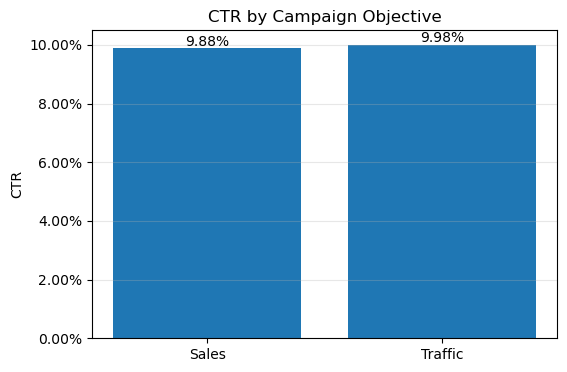

In [9]:
import matplotlib.pyplot as plt

# Menentukan batas atas sumbu Y
upper_limit = 0.105

# Membuat area grafik dengan ukuran 6 x 4 inci
plt.figure(figsize=(6, 4))

# Membuat bar chart CTR berdasarkan campaign objective
bars = plt.bar(
    ctr_by_objective['campaign_objective'],  # Kategori campaign (Traffic vs Sales)
    ctr_by_objective['CTR']                  # Nilai CTR masing-masing campaign
)

# Bar chart title
plt.title('CTR by Campaign Objective')

# Add label pada sumbu Y
plt.ylabel('CTR')

# Mengatur skala sumbu Y
plt.ylim(0, upper_limit)

# Mengubah format angka di sumbu Y menjadi persen
plt.gca().yaxis.set_major_formatter(
    plt.FuncFormatter(lambda y, _: f'{y:.2%}')
)

# Looping untuk setiap bar pada grafik
for bar in bars:
    # Mengambil nilai tinggi bar (CTR)
    height = bar.get_height()
    
    # Add label nilai CTR
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        height,                             
        f'{height*100:.2f}%',              
        ha='center',                        
        va='bottom'                        
    )

# Add horizontal grid 
plt.grid(axis='y', alpha=0.3)

# Menampilkan grafik
plt.show()

## 3. Total Purchase Value (Omzet)

In [10]:
total_revenue = df['purchase_value'].sum()
print(f"Total Revenue: Rp {total_revenue:,.0f}")

Total Revenue: Rp 10,450,212,876


## 4. Overall ROAS (Return on Advertising Spend)

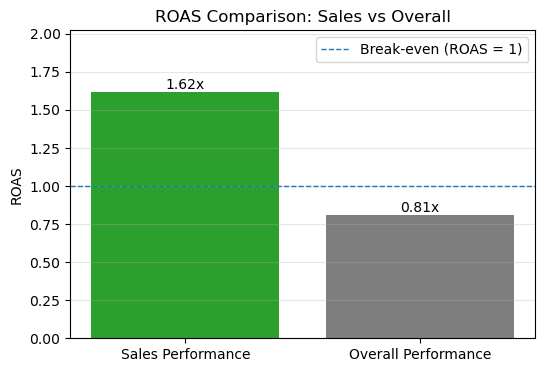

In [11]:
import matplotlib.pyplot as plt

# Hitung ROAS Sales
sales_data = df[df['campaign_objective'] == 'Sales']
roas_sales = sales_data['purchase_value'].sum() / sales_data['amount_spent'].sum()

# Hitung ROAS Overall
roas_overall = df['purchase_value'].sum() / df['amount_spent'].sum()

# Data untuk visualisasi
labels = ['Sales Performance', 'Overall Performance']
values = [roas_sales, roas_overall]
colors = ['#2ca02c', '#7f7f7f']  # hijau = profitable, abu-abu = overall

plt.figure(figsize=(6,4))
bars = plt.bar(labels, values, color=colors)

# Garis break-even
plt.axhline(
    y=1,
    linestyle='--',
    linewidth=1,
    label='Break-even (ROAS = 1)'
)

plt.title('ROAS Comparison: Sales vs Overall')
plt.ylabel('ROAS')
plt.legend()

# Label nilai ROAS di atas bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.2f}x',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.ylim(0, max(values) * 1.25)
plt.grid(axis='y', alpha=0.3)
plt.show()


# TREND & TIME SERIES ANALYSIS

### Monthly Performance

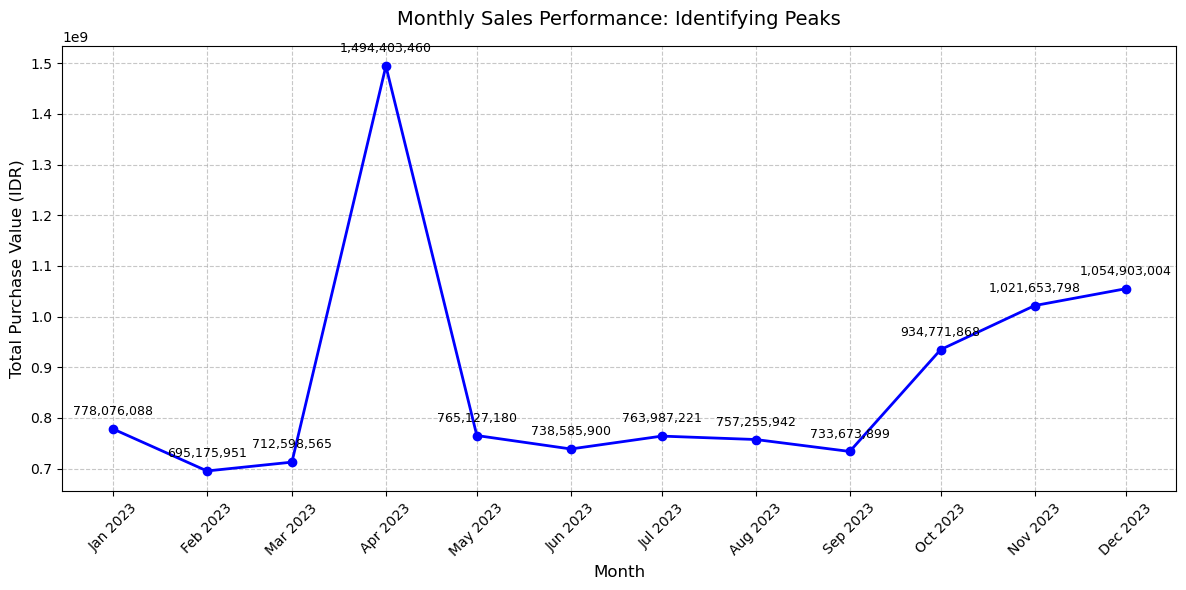

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 1. Pastikan kolom tanggal formatnya sudah benar
df['created_date'] = pd.to_datetime(df['created_date'])

# 2. Resample data ke tingkat bulan ('MS' = Month Start) dan jumlahkan purchase_value
# Ini untuk memastikan kita melihat total omset tiap satu bulan penuh
monthly_performance = df.set_index('created_date')['purchase_value'].resample('MS').sum().reset_index()

# 3. Setup plotting pakai Matplotlib (plt)
plt.figure(figsize=(12, 6))
plt.plot(monthly_performance['created_date'], monthly_performance['purchase_value'], 
         marker='o', linestyle='-', color='b', linewidth=2)

# 4. SETTING SUMBU X: Menampilkan tiap bulan
# Kita paksa sumbu X pakai MonthLocator supaya tidak ada bulan yang terlewati
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y')) # Format: Jan 2024, Feb 2024, dst.

# 5. Memberikan label dan judul
plt.title('Monthly Sales Performance: Identifying Peaks', fontsize=14, pad=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Purchase Value (IDR)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# 6. Tambahkan anotasi otomatis untuk membantu melihat angka pastinya
for i, row in monthly_performance.iterrows():
    plt.annotate(f"{row['purchase_value']:,.0f}", 
                 (row['created_date'], row['purchase_value']),
                 textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Industry & Account Analysis

## Highest-Grossing Industry

C:\Users\Dell\AppData\Local\Temp\ipykernel_15500\534283740.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(brand_data))


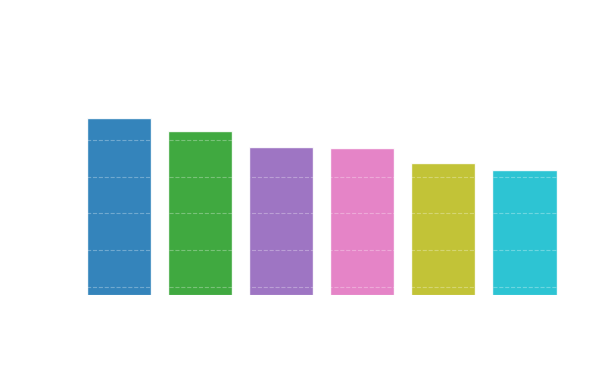

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Agregasi Data
brand_data = df.groupby('account_name')['purchase_value'].sum().reset_index()
brand_data = brand_data.sort_values(by='purchase_value', ascending=False)
brand_data['revenue_billions'] = brand_data['purchase_value'] / 1e9

# Setup backgorund transparan/gelap
fig, ax = plt.subplots(figsize=(6, 4))
fig.patch.set_facecolor('none') # Membuat background figure transparan
ax.set_facecolor('none')      # Membuat background axis transparan

colors = plt.cm.get_cmap('tab10', len(brand_data))

# Membuat Bar Chart
bars = ax.bar(brand_data['account_name'], brand_data['revenue_billions'], 
               color=colors(np.arange(len(brand_data))), edgecolor='white', alpha=0.9)

# Zoom In untuk agar terlihat perbedaan tinggi bar chart
min_val = brand_data['revenue_billions'].min()
ax.set_ylim(min_val * 0.9, 1.9) 

# 5. Ubah warna teks label
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.03, f'{yval:.2f}B', 
             va='bottom', ha='center', fontsize=9, fontweight='bold', color='white')

# Ubah warna judul dan label sumbu
ax.set_title('Industry Revenue', fontsize=11, fontweight='bold', color='white')
ax.set_ylabel('Billions IDR', fontsize=9, color='white')

# Ubah warna angka di sumbu X dan Y
ax.tick_params(axis='x', colors='white', labelsize=8)
ax.tick_params(axis='y', colors='white', labelsize=8)
plt.xticks(rotation=45, ha='right')

# Ubah warna spines
for spine in ax.spines.values():
    spine.set_edgecolor('white')

# Ubah warna Grid
ax.grid(axis='y', linestyle='--', alpha=0.3, color='white')

# Menampilkan Grafik
plt.tight_layout()
plt.show()

## Top-Performing Brand

C:\Users\Dell\AppData\Local\Temp\ipykernel_15500\3559997794.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('plasma', len(brand_eff))


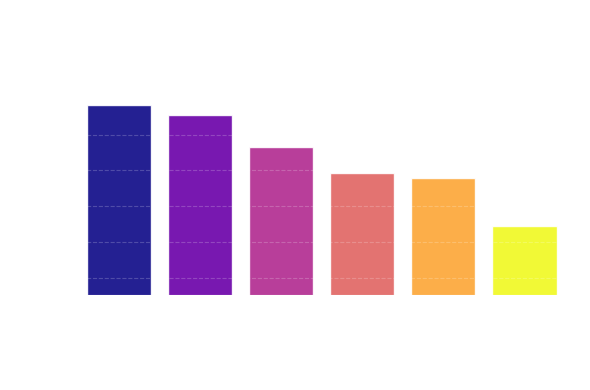

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Agregasi: Gabungkan Spend dan Purchase Value per brand unik
brand_eff = df.groupby('account_name')[['amount_spent', 'purchase_value']].sum().reset_index()

# 2. Hitung Efektivitas: Kita hitung Revenue per 1 IDR Spend (serupa dengan ROAS)
brand_eff['effectiveness_ratio'] = brand_eff['purchase_value'] / brand_eff['amount_spent']

# 3. Urutkan dari yang paling efektif (paling tinggi rationya)
brand_eff = brand_eff.sort_values(by='effectiveness_ratio', ascending=False)

# 4. Setup Plot (Dark Mode / All White)
fig, ax = plt.subplots(figsize=(6, 4))
fig.patch.set_facecolor('none')
ax.set_facecolor('none')

# Gunakan warna 'plasma' agar nuansanya beda dengan grafik pertama
colors = plt.cm.get_cmap('plasma', len(brand_eff))

# 5. Membuat Bar Chart
bars = ax.bar(brand_eff['account_name'], brand_eff['effectiveness_ratio'], 
               color=colors(np.arange(len(brand_eff))), edgecolor='white', alpha=0.9)

# 6. Trik Kontras: Zoom In pada rasio efektivitas
min_ratio = brand_eff['effectiveness_ratio'].min()
max_ratio = brand_eff['effectiveness_ratio'].max()
ax.set_ylim(min_ratio * 0.95, max_ratio * 1.05) 

# 7. Mengubah Semua Komponen Jadi Putih
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + (max_ratio*0.01), f'{yval:.2f}x', 
             va='bottom', ha='center', fontsize=9, fontweight='bold', color='white')

ax.set_title('Brand Effectiveness (Revenue/Spend Ratio)', fontsize=11, fontweight='bold', color='white')
ax.set_ylabel('Effectiveness Ratio', fontsize=9, color='white')
ax.tick_params(axis='x', colors='white', labelsize=8)
ax.tick_params(axis='y', colors='white', labelsize=8)
plt.xticks(rotation=45, ha='right')

for spine in ax.spines.values():
    spine.set_edgecolor('white')

ax.grid(axis='y', linestyle='--', alpha=0.2, color='white')

# 8. Tampilkan
plt.tight_layout()
plt.show()

## Highest ROAS Industry

C:\Users\Dell\AppData\Local\Temp\ipykernel_15500\3884946467.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('magma', len(industry_roas))


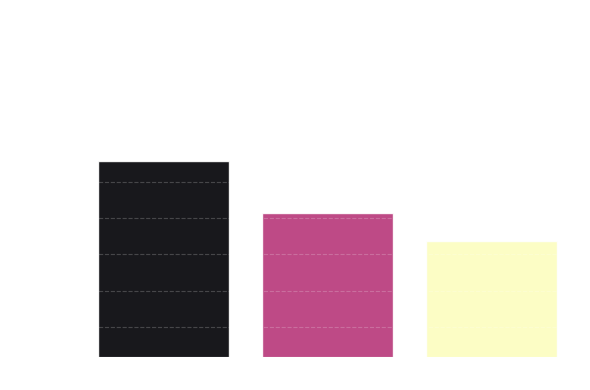

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Ekstraksi Industri
df['industry_category'] = df['account_name'].str.split('-').str[1].str.strip()

# Agregasi: Total Spend dan Revenue per Industri
industry_roas = df.groupby('industry_category')[['amount_spent', 'purchase_value']].sum().reset_index()

# Hitung ROAS
industry_roas['roas'] = industry_roas['purchase_value'] / industry_roas['amount_spent']

# Urutkan dari ROAS tertinggi
industry_roas = industry_roas.sort_values(by='roas', ascending=False)

# Setup Plot (6x4, All White/Dark Mode)
fig, ax = plt.subplots(figsize=(6, 4))
fig.patch.set_facecolor('none')
ax.set_facecolor('none')

# Palette Magma untuk visual kontras
colors = plt.cm.get_cmap('magma', len(industry_roas))

# Plotting
bars = ax.bar(industry_roas['industry_category'], industry_roas['roas'], 
               color=colors(np.arange(len(industry_roas))), edgecolor='white', alpha=0.9)

# Zoom In
min_roas = industry_roas['roas'].min()
max_roas = industry_roas['roas'].max()
ax.set_ylim(min_roas * 0.98, max_roas * 1.02) # Zoom lebih ketat agar presisi 3 desimal kelihatan gap-nya

# 8. All White Formatting
for bar in bars:
    yval = bar.get_height()
    #  Format .3f buat nampilin 3 desimal
    ax.text(bar.get_x() + bar.get_width()/2, yval + (max_roas * 0.002), f'{yval:.3f}x', 
             va='bottom', ha='center', fontsize=10, fontweight='bold', color='white')

ax.set_title('Highest ROAS by Industry', fontsize=12, fontweight='bold', color='white', pad=15)
ax.set_ylabel('ROAS (x)', fontsize=10, color='white')
ax.tick_params(axis='both', colors='white', labelsize=9)

for spine in ax.spines.values():
    spine.set_edgecolor('white')

ax.grid(axis='y', linestyle='--', alpha=0.2, color='white')

plt.tight_layout()
plt.show()